# Classification using a Decision Tree

### Importing neccesary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
os.environ["PATH"] += os.pathsep + 'C:/Users/sandi/miniconda3/Library/bin/graphviz'
# providing path to the module (Graphviz)

In [3]:
# To load built-in datasets
import sklearn.datasets as datasets

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
features=pd.DataFrame(iris.data, columns=iris.feature_names)
print(features.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# creating dataframe for target values
target = pd.DataFrame(iris.target, columns=['target'])
print(target)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [5]:
# checking if shape of feature and target value matches
print(features.shape)
print(target.shape)

(150, 4)
(150, 1)


In [6]:
# Combined dataset as dataframe
dataset = pd.concat([features,target],axis=1)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Visualizing data distribution

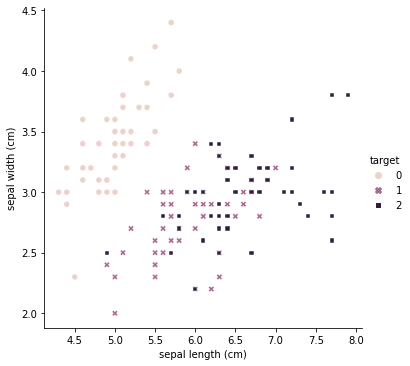

In [7]:
sns.relplot(
    x="sepal length (cm)", y="sepal width (cm)", hue='target', style='target', data=dataset)
plt.show()

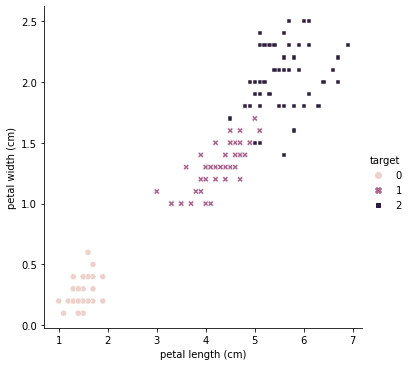

In [8]:
sns.relplot(
    x="petal length (cm)", y="petal width (cm)", hue='target', style='target', data=dataset)
plt.show()

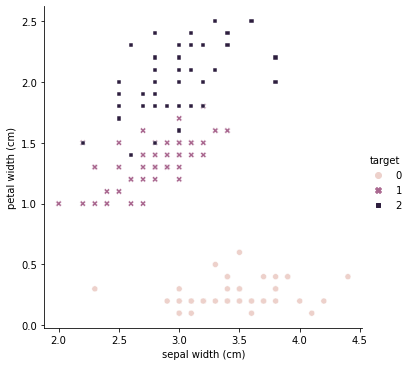

In [9]:
sns.relplot(
    x="sepal width (cm)", y="petal width (cm)", hue='target', style='target', data=dataset)
plt.show()

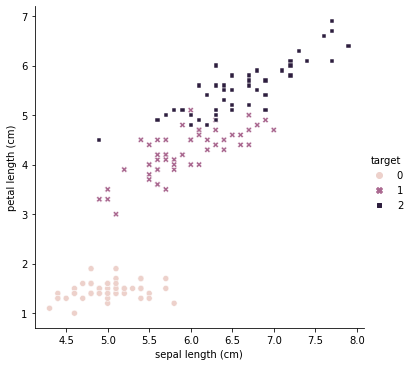

In [10]:
sns.relplot(
    x="sepal length (cm)", y="petal length (cm)", hue='target', style='target', data=dataset)
plt.show()

### Train Test Split

In [11]:
training_features, test_features, training_target, test_target = train_test_split(
    features, target, random_state=10, test_size = 0.1)
#random state 0 means not changig the radomly generated data
#train model with some data and test with rest of the data from dataset that we have

While building a machine learning model it is inefficient to train and test the model with same dataset. So, from a dataset we use some of the data to train the model with the rest we test it. Scikit-learn library provides us a function **train_test_split** that separates dataset into traing and testing dataset. The argument test_size determines how much of data is to be used for training and how much for testing. Here the value 0.1 means 10% of data is separated for testig purpose.

In [12]:
print(training_features.shape, test_features.shape)

(135, 4) (15, 4)


With the value of test_size=0.1, now we have a test dataset of size (15,4) i.e. 10% of (135,4).

In [13]:
# Defining the decision tree algorithm

dtree = DecisionTreeClassifier(criterion='entropy')
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


**DecisionTreeClassifier()** function of scikit-learn library implements the decision tree algorithm. It takes criterion as an argument whose possible values are **gini** and **entropy**. Gini measures the quality of split on the basis of gini impurity whereas entropy does it on the basis of information gain. 

In [14]:
model = dtree.fit(training_features, training_target)
#fit takes input and output / trains the model

In [15]:
predictions = model.predict(test_features)

Now that the model is trained, testing is carried out using **model.predict()** function.

Now we build a confusion matrix with the actual data and the data that model predicted.

In [16]:
matrix = confusion_matrix(test_target, predictions) 
print(matrix)

[[5 0 0]
 [0 8 0]
 [0 0 2]]


In [17]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



**classification_report()** function provides us all the details like accuracy, precision, recall and f1-score.

# Performance analysis
Accuracy is used to find the portion of correctly classified values. It is used when all the classes are equally important.
$$ Accuracy =\frac{T.P + T.N}{Total}$$
The report shows the accuracy of the model 75%. This is not that bad for less sensitive probles but for more sensitive problems we need to minimize false negatives more. In such case we use f1-score.
***

Precision is the measure of correctly identified positive cases from all the predicted positive cases. It is useful when the costs of False Positives is high.
$$ Precision =\frac{T.P}{T.P + F.P}$$
According to the report, precision for first class is 1. This means the model could classify all the positive values correctly for the first class. But the model could only classify 67% and 75% positive values correctly for second and third class respectively.
***

Recall is the measure of the correctly identified positive cases from all the actual positive cases. It is useful when the cost of False Negatives is high.
$$ Recall =\frac{T.P}{T.P + F.N}$$
According to the report above, the model could only predict 75% of positive values correctly for all the classes.
***

F1-score is the harmonic mean of recall and precision. It provides a better measure of the incorrectly classified cases than the accuracy metric.
$$ f1-score =\frac{2*Precision*Recall}{Precision + Recall}$$
Here the f1-score of first class is maximum which means there are less false negative value for first class.

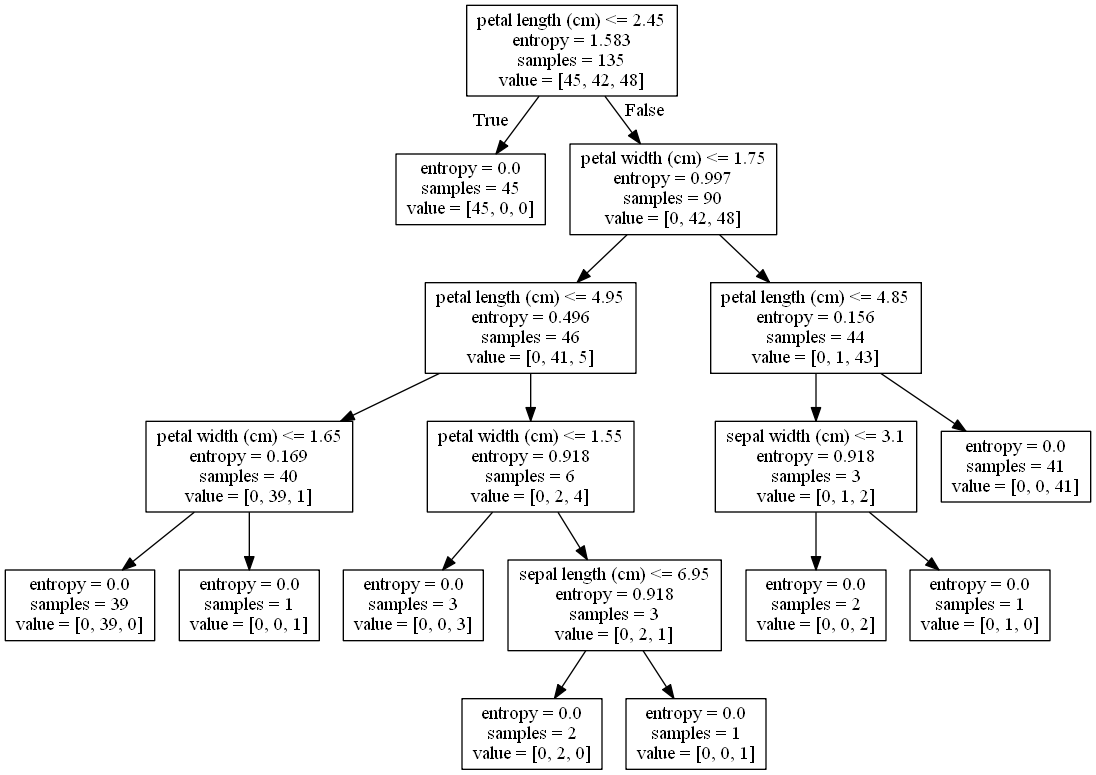

In [18]:
from IPython.display import Image
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')
Image(graph.create_png())